### Gorle Manasa
### Task-6: Decision Tree classifier and visualize it graphically.
#### gripmay2021

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import plotly as pl
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,iplot, plot
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('Iris.csv')

### Rename columns as per convinience

In [4]:
df.rename({'SepalLengthCm':'sepal_length', 'SepalWidthCm':'sepal_width',
           'PetalLengthCm':'petal_length','PetalWidthCm':'petal_width','Species':'species'}, inplace = True, axis =1)

In [5]:
df.drop('Id',axis=1, inplace=True)

In [6]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Visualization using heatmap for corrolation of columns 

<AxesSubplot:>

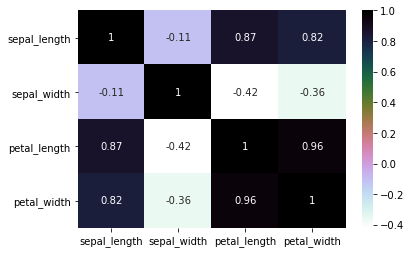

In [11]:
sns.heatmap(df.corr(), annot=True,cmap='cubehelix_r')

### the most corrolated columns are petal length and petal width 

### Plot between sepal length and petal width 

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

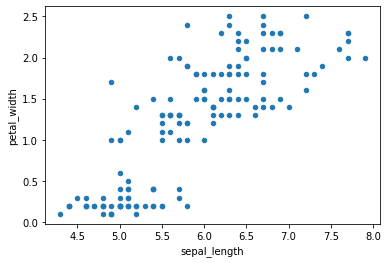

In [12]:
df.plot(kind='scatter', x='sepal_length',y='petal_width',cmap='turbo')

### kde plot for petal length and petal width 

C:\Users\SriVa\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning:

The following kwargs were not used by contour: 'size'



<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

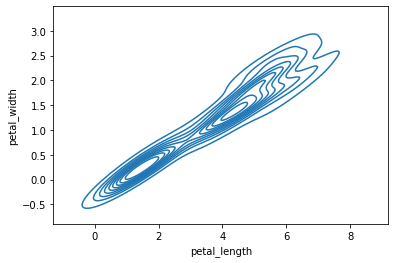

In [13]:
sns.kdeplot(data= df, x="petal_length", y="petal_width", size=5)

### scatter plot between sepal length and sepal width 

In [14]:
px.scatter(df,'sepal_length','sepal_width')

### Boxplot against species to every column [sepal_length, sepal_width, petal_length, petal_width]

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

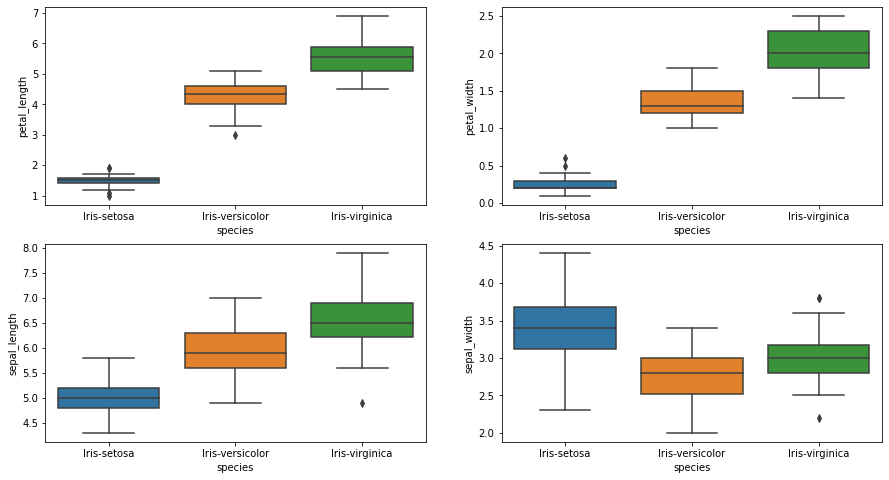

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=df)

### Barplot of species to all the columns

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

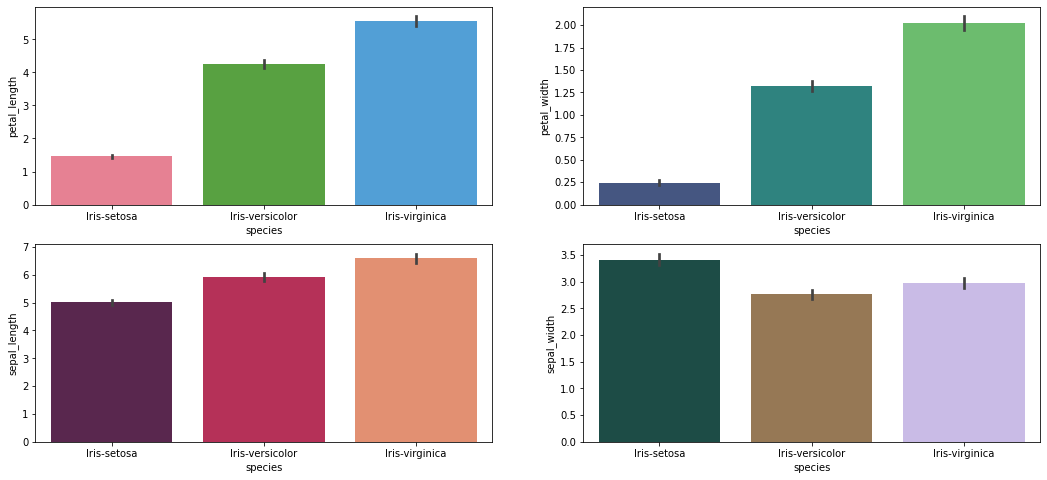

In [16]:
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.barplot(data=df,x='species',y='petal_length',palette='husl')
plt.subplot(2,2,2)
sns.barplot(data=df,x='species',y='petal_width',palette="viridis")
plt.subplot(2,2,3)
sns.barplot(data=df,x='species',y='sepal_length',palette="rocket")
plt.subplot(2,2,4)
sns.barplot(data=df,x='species',y='sepal_width',palette="cubehelix")

### 3d visualization of sepal length, sepal width and petal length

In [17]:
import plotly.graph_objs as go

track_3d = go.Scatter3d(
                        x = df.sepal_length,
                        y = df.sepal_width,
                        z = df.petal_length,
                        mode = 'markers',
                        opacity = 0.8,
                        #name = df.Species,
                        marker = dict(
                                    size = 5,
                                    color = df.petal_width
                        )
)
no_limit = [track_3d]

fig_3d = go.Figure(data = no_limit)
iplot(fig_3d)

### Declaring x and y variables for model deployment

In [18]:
X = df.drop('species',axis=1)

In [19]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y = df['species']

In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y = le.fit_transform(y)

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Importing Decision tree classifier and fitting the model 

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

### predicting the model

In [25]:
predictions = dt.predict(X_test)

### Import metrics to check the error of the model 

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
from sklearn import metrics

### Confusion matrix

In [28]:
print(confusion_matrix(y_test,predictions))

[[19  0  0]
 [ 0 13  1]
 [ 0  0 12]]


### Classification report 

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



### Print the accuracy score to check the accuracy of the model

In [30]:
print('print the accuracy score as',metrics.accuracy_score(y_test,predictions))

print the accuracy score as 0.9777777777777777


### Visualizating graphically

[Text(465.0, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 36, 38]'),
 Text(372.0, 427.11428571428576, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(558.0, 427.11428571428576, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(465.0, 349.4571428571429, 'X[2] <= 5.35\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(372.0, 271.8, 'X[0] <= 4.95\ngini = 0.1\nsamples = 38\nvalue = [0, 36, 2]'),
 Text(186.0, 194.14285714285717, 'X[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(93.0, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(279.0, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(558.0, 194.14285714285717, 'X[2] <= 4.95\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(465.0, 116.48571428571432, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(651.0, 116.48571428571432, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(558.0, 3

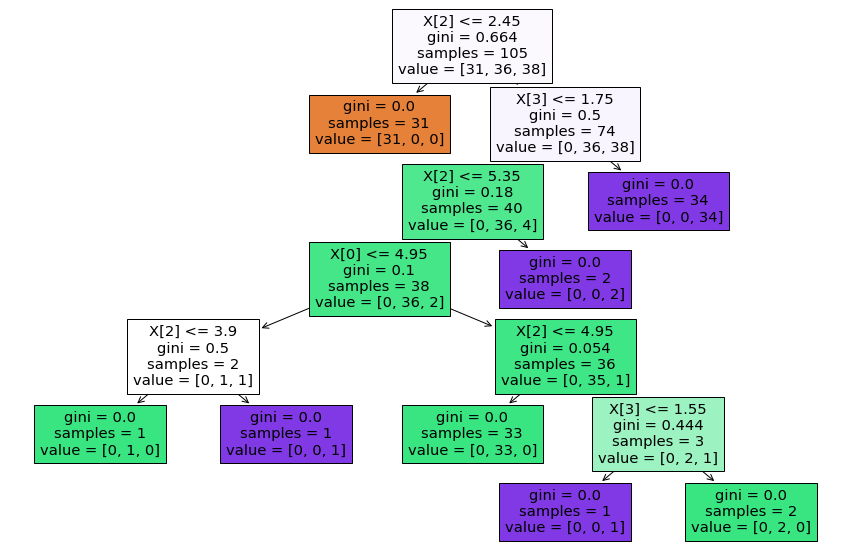

In [32]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

### Export Text

In [33]:
print(tree.export_text(dt))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  3.90
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- class: 2



##                                                             Thank you 